Average Heart Rate: 86.37 BPM


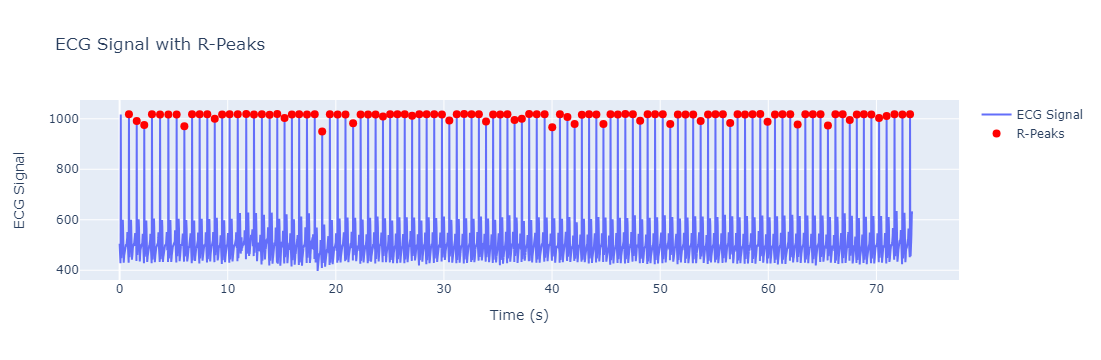

In [2]:
# R PEAKS WITH HEART RATE
import pandas as pd
import neurokit2 as nk
import numpy as np
import plotly.graph_objects as go

csv_file = 'C:\\Users\\PAYAL\\Downloads\\data_2024-09-10_18-27-21.csv' 
data = pd.read_csv(csv_file)

ecg_data = data['Channel1'] 
time = np.arange(len(ecg_data)) / 250  # Create a time array in sec
ecg_signal = nk.ecg_clean(ecg_data, sampling_rate=250) 
peaks = nk.ecg_findpeaks(ecg_signal, sampling_rate=250)
r_peak_indices = peaks['ECG_R_Peaks']
r_peak_times = r_peak_indices / 250
rr_intervals = np.diff(r_peak_times)
heart_rate = 60 / rr_intervals.mean() if len(rr_intervals) > 0 else np.nan
print(f'Average Heart Rate: {heart_rate:.2f} BPM')

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=ecg_data, mode='lines', name='ECG Signal'))

fig.add_trace(go.Scatter(x=time[r_peak_indices], y=ecg_data.iloc[r_peak_indices],
                         mode='markers', name='R-Peaks', marker=dict(color='red', size=8)))

fig.update_layout(title='ECG Signal with R-Peaks',
                  xaxis_title='Time (s)',
                  yaxis_title='ECG Signal')

fig.show()

Average Heart Rate: 86.48 BPM


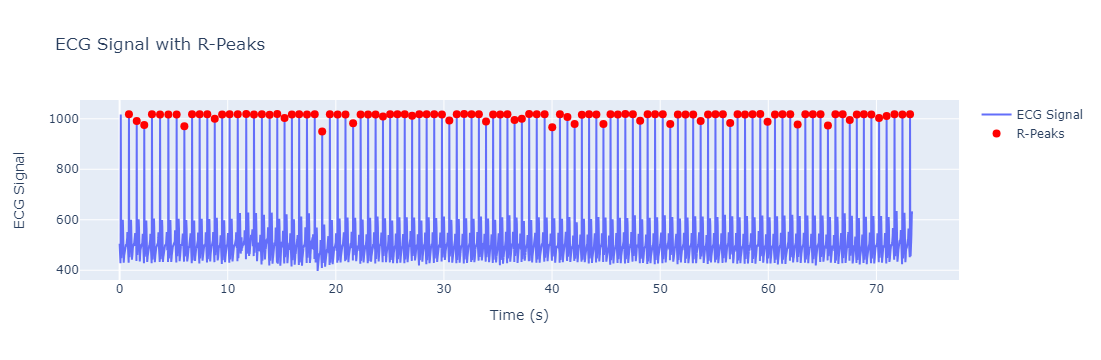

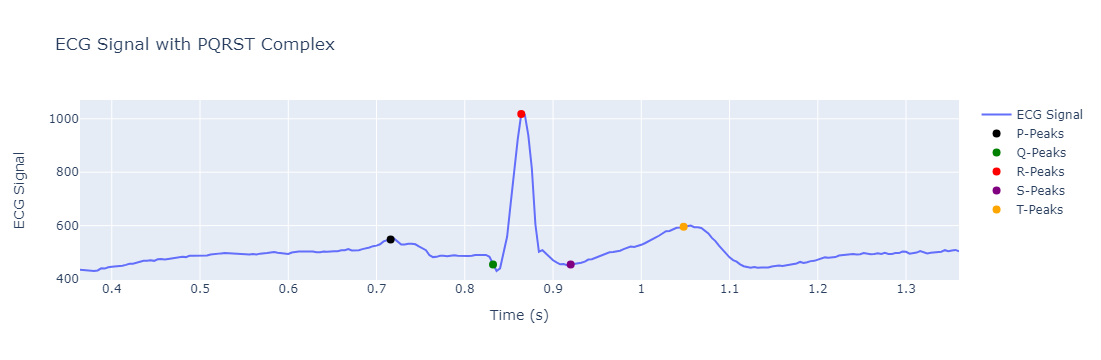

In [52]:
import pandas as pd
import neurokit2 as nk
import numpy as np
import plotly.graph_objects as go

csv_file = 'C:\\Users\\PAYAL\\Downloads\\data_2024-09-10_18-27-21.csv'  
data = pd.read_csv(csv_file)                  #READ CSV FILE

ecg_data = data['Channel1']
time = np.arange(len(ecg_data)) / 250      # Create a time array in seconds
ecg_signal = nk.ecg_clean(ecg_data, sampling_rate=250)        #Clean 
peaks = nk.ecg_findpeaks(ecg_signal, sampling_rate=250)       #find peaks
heart_rate = nk.ecg_rate(peaks, sampling_rate=250)            #heart rate
average_heart_rate = np.mean(heart_rate)                      #mean of heart rate
print(f'Average Heart Rate: {average_heart_rate:.2f} BPM')    #print heart rate

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=ecg_data, mode='lines', name='ECG Signal'))

fig.add_trace(go.Scatter(x=time[r_peak_indices], y=ecg_data.iloc[r_peak_indices],
                         mode='markers', name='R-Peaks', marker=dict(color='red', size=8)))

fig.update_layout(title='ECG Signal with R-Peaks',
                  xaxis_title='Time (s)',
                  yaxis_title='ECG Signal')

fig.show()          #plot all R-Peaks

_, delineate = nk.ecg_delineate(ecg_signal, r_peak_indices, sampling_rate=250) # Identify PQRST complexes using nk.ecg_delineate

p_peaks = np.array(delineate['ECG_P_Peaks'])  # Extract P, Q, R, S, T peaks and convert to NumPy arrays
q_peaks = np.array(delineate['ECG_Q_Peaks'])
s_peaks = np.array(delineate['ECG_S_Peaks'])
t_peaks = np.array(delineate['ECG_T_Peaks'])

if len(r_peak_indices) > 0:           # Select a single PQRST complex by choosing the R-peak with the highest value
    highest_r_peak_idx = r_peak_indices[0] 

    # Define a window around the R-peak to capture the full PQRST complex
    window_size = int(0.5 * 250)  # Half a second before and after the R-peak 
    start_idx = max(0, highest_r_peak_idx - window_size)  
    end_idx = min(len(ecg_signal), highest_r_peak_idx + window_size) 

    # Extract the time and ECG data for the window
    window_time = time[start_idx:end_idx]
    window_ecg = ecg_data[start_idx:end_idx]
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=window_time, y=window_ecg, mode='lines', name='ECG Signal'))

    def plot_peaks(peaks, peak_name, color):
        window_peaks = [peak for peak in peaks if start_idx <= peak < end_idx]
        if window_peaks:
            fig.add_trace(go.Scatter(x=time[window_peaks], y=ecg_data.iloc[window_peaks],
                                     mode='markers', name=peak_name, marker=dict(color=color, size=8)))

    plot_peaks(valid_p_peaks, 'P-Peaks', 'black')
    plot_peaks(valid_q_peaks, 'Q-Peaks', 'green')
    plot_peaks(r_peak_indices, 'R-Peaks', 'red')
    plot_peaks(valid_s_peaks, 'S-Peaks', 'purple')
    plot_peaks(valid_t_peaks, 'T-Peaks', 'orange')

    fig.update_layout(title='ECG Signal with PQRST Complex',
                      xaxis_title='Time (s)',
                      yaxis_title='ECG Signal')
    fig.show()  #PQRST 
else:
    print("No R-peaks found.")

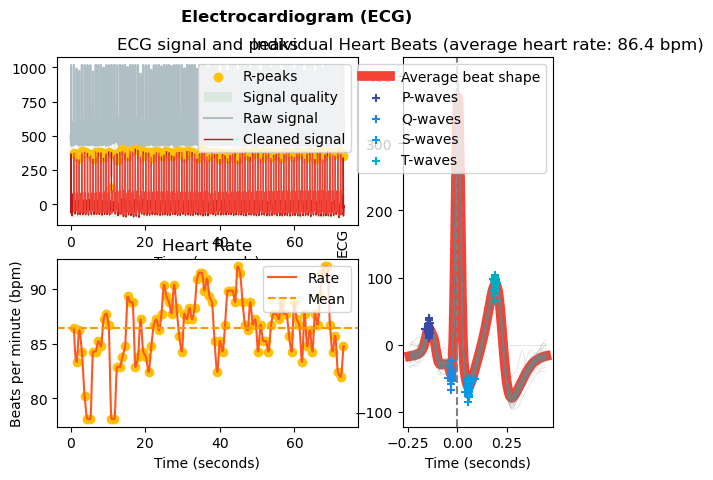

In [42]:
#nk.ecg_process()
import neurokit2 as nk

csv_file = 'C:\\Users\\PAYAL\\Downloads\\data_2024-09-10_18-27-21.csv' 
data = pd.read_csv(csv_file)
ecg_data = data['Channel1']
time = np.arange(len(ecg_data)) / 250  # Create a time array in seconds

signals, info = nk.ecg_process(ecg_data, sampling_rate=250) # Process the ECG signal using nk.ecg_process()
nk.ecg_plot(signals, info) # Plot the cleaned ECG signal with R-peaks and PQRST complex

Average Heart Rate: 86.48 BPM


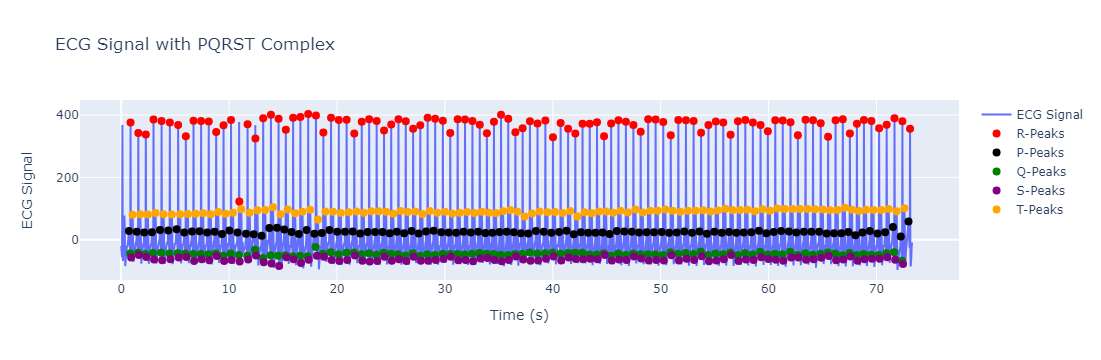

In [47]:
import pandas as pd
import neurokit2 as nk
import numpy as np
import plotly.graph_objects as go

csv_file = 'C:\\Users\\PAYAL\\Downloads\\data_2024-09-10_18-27-21.csv' 
data = pd.read_csv(csv_file)

ecg_data = data['Channel1']
time = np.arange(len(ecg_data)) / 250  # Create a time array in seconds

signals, info = nk.ecg_process(ecg_data, sampling_rate=250)
cleaned_ecg = signals['ECG_Clean']
r_peaks = info['ECG_R_Peaks']
p_peaks = info.get('ECG_P_Peaks', [])
q_peaks = info.get('ECG_Q_Peaks', [])
s_peaks = info.get('ECG_S_Peaks', [])
t_peaks = info.get('ECG_T_Peaks', [])

rr_intervals = np.diff(r_peaks) / 250  # R-R intervals in seconds
heart_rate = 60 / rr_intervals  # Heart rate in BPM for each interval
average_heart_rate = np.mean(heart_rate)  # Compute the average heart rate
print(f'Average Heart Rate: {average_heart_rate:.2f} BPM')

fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=cleaned_ecg, mode='lines', name='ECG Signal'))

def add_peak_trace(peak_indices, name, color):
    if len(peak_indices) > 0:
        # Filter valid indices
        valid_indices = [i for i in peak_indices if 0 <= i < len(time)]
        if valid_indices:
            fig.add_trace(go.Scatter(x=time[valid_indices], y=cleaned_ecg[valid_indices],
                                     mode='markers', name=name, marker=dict(color=color, size=8)))

add_peak_trace(r_peaks, 'R-Peaks', 'red')
add_peak_trace(p_peaks, 'P-Peaks', 'black')
add_peak_trace(q_peaks, 'Q-Peaks', 'green')
add_peak_trace(s_peaks, 'S-Peaks', 'purple')
add_peak_trace(t_peaks, 'T-Peaks', 'orange')

fig.update_layout(title='ECG Signal with PQRST Complex',
                  xaxis_title='Time (s)',
                  yaxis_title='ECG Signal')
fig.show()